In [3]:
#https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
!pip install librosa

In [21]:
#Audio de prueba https://www.nch.com.au/acm/8k16bitpcm.wav
import librosa
audio_data = '/content/8k16bitpcm.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [5]:
librosa.load(audio_data, sr=44100)

(array([ 1.3063522e-04,  1.0222942e-04,  4.8317015e-05, ...,
         6.7659494e-05,  1.7263141e-05, -2.1920510e-05], dtype=float32),
 44100)

In [6]:
import IPython.display as ipd
ipd.Audio(audio_data)

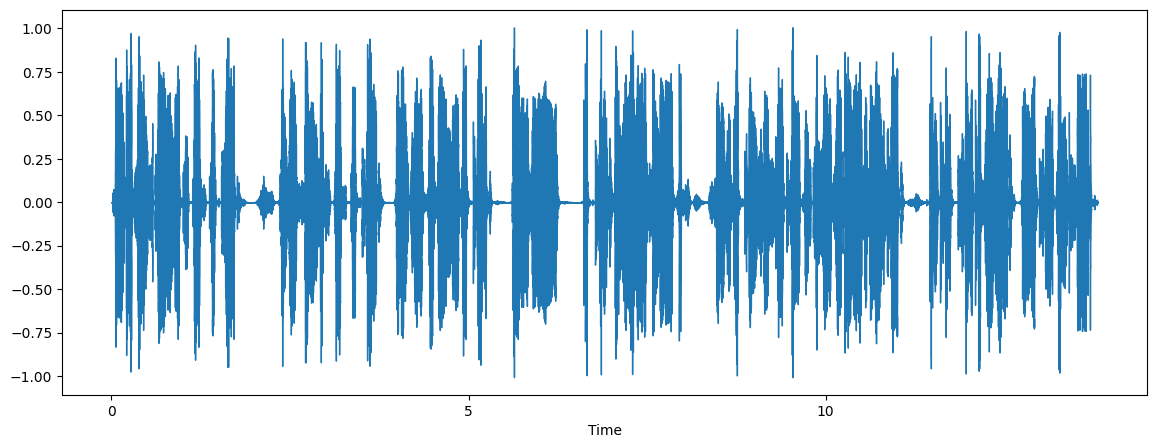

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)


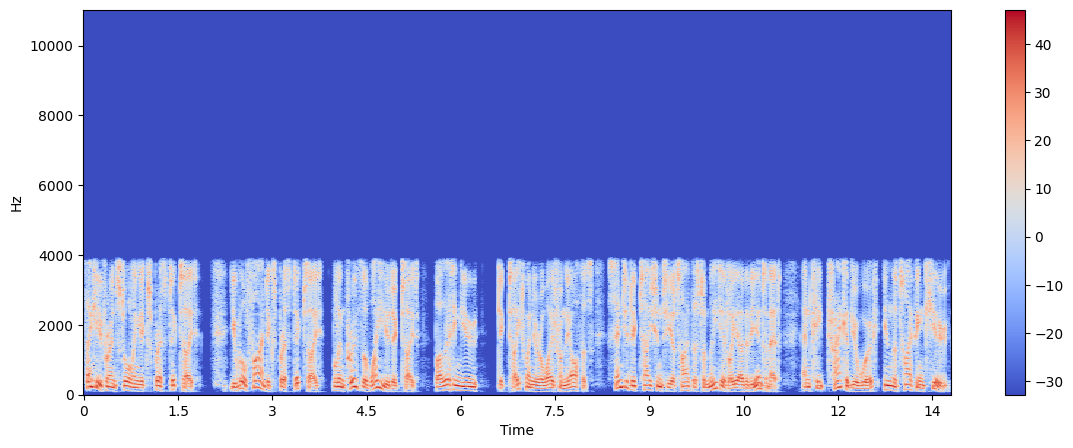

In [8]:
X = librosa.stft(x) #Fourier
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

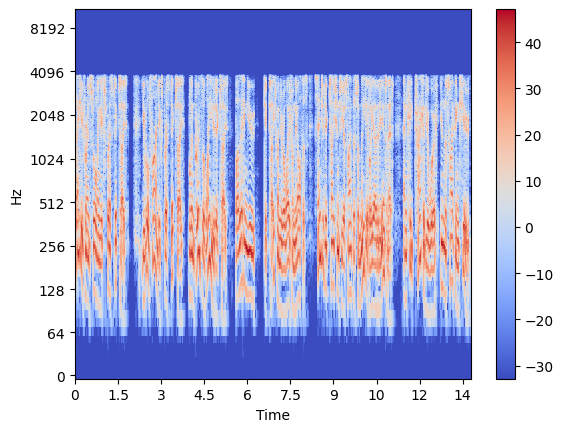

In [9]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [10]:
#Hacer sonar una función de onda
import numpy as np

sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
xsin = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(xsin, rate=sr) # load a NumPy array
#Saving the audio
#librosa.output.write_wav('tone_220.wav', x, sr)


import soundfile as sf
sf.write('tone_220.wav', xsin, sr)

In [20]:
import IPython.display as ipd
ipd.Audio(x,  rate=sr)

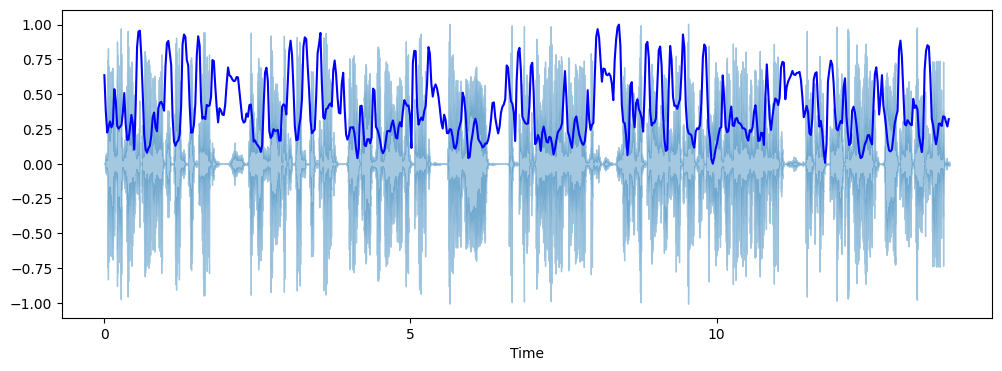

In [34]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

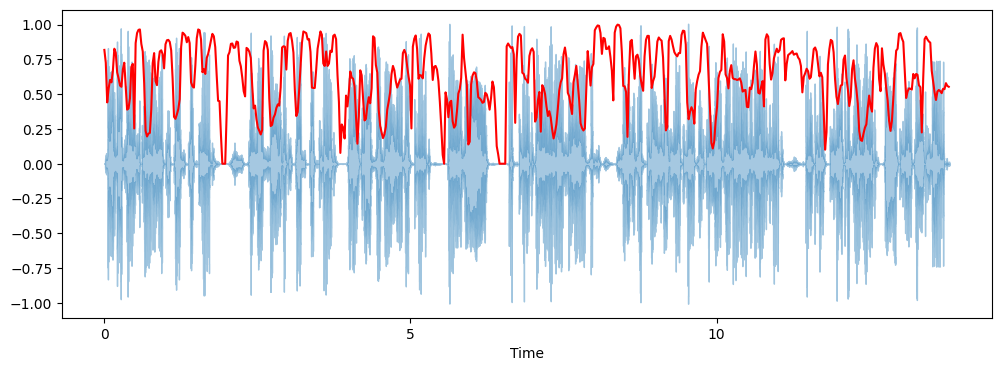

In [35]:
import sklearn
from sklearn import preprocessing
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
t = librosa.frames_to_time(frames)
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')